In [567]:
import pandas as pd
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [568]:
headers = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

url = "https://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=&GameSegment=&Height=&ISTRound=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2024-25&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision="

In [569]:
response = requests.get(url=url, headers=headers).json()

# Team data - win%, w/L etc

In [571]:
headers = response['resultSets'][0]['headers']
rows = response['resultSets'][0]['rowSet']
teams = pd.DataFrame(rows, columns=headers)
teams.to_csv("TeamData.csv")
teams["TEAM_NAME"] = teams["TEAM_NAME"].replace("LA Clippers", "Los Angeles Clippers")
teams

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,1610612737,Atlanta Hawks,82,40,42,0.488,48.2,43.4,91.8,0.472,...,14,2,26,2,12,15,22,8,5,18
1,1610612738,Boston Celtics,82,61,21,0.744,48.4,41.6,90.0,0.462,...,8,16,2,29,5,1,2,27,8,3
2,1610612751,Brooklyn Nets,82,26,56,0.317,48.2,37.6,86.1,0.437,...,29,24,23,20,26,27,28,14,29,26
3,1610612766,Charlotte Hornets,82,19,63,0.232,48.2,38.3,89.1,0.430,...,9,26,25,26,21,23,16,22,30,27
4,1610612741,Chicago Bulls,82,39,43,0.476,48.2,43.2,92.0,0.470,...,3,5,20,24,18,18,6,30,6,20
5,1610612739,Cleveland Cavaliers,82,64,18,0.780,48.2,44.5,90.8,0.491,...,6,9,3,14,27,8,11,11,1,2
6,1610612742,Dallas Mavericks,82,39,43,0.476,48.1,42.0,87.7,0.479,...,23,22,13,21,7,12,8,16,15,19
7,1610612743,Denver Nuggets,82,50,32,0.610,48.4,45.4,89.8,0.506,...,4,1,17,17,15,19,6,9,3,9
8,1610612765,Detroit Pistons,82,44,38,0.537,48.3,42.7,89.8,0.476,...,13,15,21,19,9,17,27,13,12,13
9,1610612744,Golden State Warriors,82,48,34,0.585,48.1,40.8,90.4,0.451,...,7,4,14,4,17,24,23,18,17,10


# Player stats

In [573]:
headers2 = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

url2 = "https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&ISTRound=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2024-25&SeasonSegment=&SeasonType=Playoffs&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

In [574]:
response2 = requests.get(url=url2, headers=headers2).json()

In [575]:
headers2 = response2['resultSets'][0]['headers']
rows2 = response2['resultSets'][0]['rowSet']
players = pd.DataFrame(rows2, columns=headers2)
players.to_csv("PlayerData.csv")
players

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
0,1631260,AJ Green,AJ,1610612749,MIL,25.0,5,1,4,0.200,...,113,134,41,146,70,73,88,41,4,81
1,203932,Aaron Gordon,Aaron,1610612743,DEN,29.0,7,4,3,0.571,...,68,8,25,20,23,62,41,41,4,40
2,1628988,Aaron Holiday,Aaron,1610612745,HOU,28.0,3,3,0,1.000,...,140,134,131,93,128,168,153,41,4,148
3,1630174,Aaron Nesmith,Aaron,1610612754,IND,25.0,6,5,1,0.833,...,53,87,6,74,49,32,51,19,4,49
4,1630598,Aaron Wiggins,Aaron,1610612760,OKC,26.0,4,4,0,1.000,...,140,68,153,93,79,56,111,41,4,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1631246,Vince Williams Jr.,Vince,1610612763,MEM,24.0,3,0,3,0.000,...,86,134,131,149,122,79,118,41,4,118
205,1628427,Vlatko Čančar,Vlatko,1610612743,DEN,28.0,2,2,0,1.000,...,140,134,181,169,191,162,209,41,4,204
206,1628976,Wendell Carter Jr.,Wendell,1610612753,ORL,26.0,5,1,4,0.200,...,76,52,48,60,75,199,59,12,4,61
207,1641744,Zach Edey,Zach,1610612763,MEM,22.0,4,0,4,0.000,...,2,42,25,54,103,202,68,41,4,78


In [576]:
players.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
       'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
       'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
       'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
       'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
       'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK'],
      dtype='object')

# Business Data

In [578]:
valuation = pd.read_csv("nba_3/nba_franchise_values_2024.csv")
valuation.rename(columns={'Team': 'TEAM_NAME'}, inplace=True)
valuation # team valuation 2024

,TEAM_NAME,Franchise Value (billion USD)
0,Golden State Warriors,8.80
1,Los Angeles Lakers,7.50
2,Cleveland Cavaliers,7.10
3,Chicago Bulls,6.00
4,Boston Celtics,5.50
5,Miami Heat,5.00
6,Houston Rockets,4.90
7,Oklahoma City Thunder,4.80
8,Milwaukee Bucks,4.70
9,Los Angeles Clippers,4.60


In [579]:
BI = pd.read_csv("nba_3/NBA_Team_Business_Metrics.csv")
BI #Insta, X, Franchise Valuation, Revenue 24-25
BI.rename(columns={'Team': 'TEAM_NAME'}, inplace=True)
BI

,TEAM_NAME,Instagram Followers (millions),X Followers (millions),Franchise Value (billion USD),Revenue (million USD)
0,Golden State Warriors,90.6,45.7,8.80,800
1,Los Angeles Lakers,32.6,12.0,7.50,543
2,Cleveland Cavaliers,25.3,8.5,7.10,522
3,Chicago Bulls,16.6,5.0,6.00,457
4,Boston Celtics,10.2,4.7,5.50,437
5,Miami Heat,8.4,4.1,5.00,416
6,Houston Rockets,6.7,3.5,4.90,414
7,Oklahoma City Thunder,6.3,3.3,4.80,396
8,Milwaukee Bucks,6.1,3.2,4.70,391
9,Los Angeles Clippers,5.5,2.8,4.60,381


In [580]:
rev = pd.read_csv("nba_3/nba_team_revenues_2023_24.csv")
rev #team revenue 23-24
rev.rename(columns={'Team': 'TEAM_NAME'}, inplace=True)
rev

,TEAM_NAME,Revenue (million USD)
0,Golden State Warriors,800
1,Los Angeles Lakers,543
2,Cleveland Cavaliers,522
3,Chicago Bulls,457
4,Boston Celtics,437
5,Miami Heat,416
6,Houston Rockets,414
7,Oklahoma City Thunder,396
8,Milwaukee Bucks,391
9,Los Angeles Clippers,381


In [581]:
X = pd.read_csv("nba_3/nba_x_followers_2024.csv")
X #x followers 2024
X.rename(columns={'Team': 'TEAM_NAME'}, inplace=True)
X

,TEAM_NAME,X Followers (millions)
0,Golden State Warriors,45.7
1,Los Angeles Lakers,12.0
2,Cleveland Cavaliers,8.5
3,Chicago Bulls,5.0
4,Boston Celtics,4.7
5,Miami Heat,4.1
6,Houston Rockets,3.5
7,Oklahoma City Thunder,3.3
8,Milwaukee Bucks,3.2
9,Los Angeles Clippers,2.8


In [582]:
cnbc_valuation = pd.read_csv("nba_3/cnbc_nba_team_valuations_2025.csv")
cnbc_valuation #2025
cnbc_valuation.rename(columns={'Team': 'TEAM_NAME'}, inplace=True)
cnbc_valuation

,Rank,TEAM_NAME,Value (Billion USD),Revenue (Million USD),EBITDA (Million USD),Debt as % of Value,Owner(s)
0,1,Golden State Warriors,9.40,781,155,9%,"Joe Lacob, Peter Guber"
1,2,New York Knicks,7.50,578,178,4%,Madison Square Garden Sports
2,3,Los Angeles Lakers,7.00,528,191,3%,"Jerry Buss family trust, Mark Walter, Todd Boehly"
3,4,Chicago Bulls,5.80,402,118,3%,Jerry Reinsdorf
4,5,Houston Rockets,5.70,402,119,4%,Tilman Fertitta
5,6,Brooklyn Nets,5.60,389,78,16%,Joe Tsai
6,7,Boston Celtics,5.50,452,17,6%,"Wyc Grousbeck, Irving Grousbeck, Stephen Pagli..."
7,8,Los Angeles Clippers,5.40,351,-114,4%,Steve Ballmer
8,9,Miami Heat,5.10,394,65,8%,Micky Arison
9,10,Dallas Mavericks,5.00,430,132,4%,"Miriam Adelson and Patrick and Sivan Dumont, M..."


In [629]:
attendance = pd.read_csv("nba_3/nba_attendance_2025_home_only.csv")
attendance #2025

,Rank,Team,Home GMS,Home Total Attendance
0,1.0,Hawks,40,657613
1,NaN,Celtics,41,785396
2,NaN,Pelicans,41,689400
3,NaN,Bulls,41,825659
4,NaN,Cavaliers,41,796712
5,NaN,Mavericks,40,803174
6,NaN,Nuggets,41,811211
7,NaN,Pistons,41,781929
8,NaN,Warriors,41,740624
9,NaN,Rockets,41,716853


In [584]:
name_to_abbr = {
    'Atlanta Hawks': 'ATL', 'Boston Celtics': 'BOS', 'Brooklyn Nets': 'BKN',
    'Charlotte Hornets': 'CHA', 'Chicago Bulls': 'CHI', 'Cleveland Cavaliers': 'CLE',
    'Dallas Mavericks': 'DAL', 'Denver Nuggets': 'DEN', 'Detroit Pistons': 'DET',
    'Golden State Warriors': 'GSW', 'Houston Rockets': 'HOU', 'Indiana Pacers': 'IND',
    'LA Clippers': 'LAC', 'Los Angeles Lakers': 'LAL', 'Memphis Grizzlies': 'MEM',
    'Miami Heat': 'MIA', 'Milwaukee Bucks': 'MIL', 'Minnesota Timberwolves': 'MIN',
    'New Orleans Pelicans': 'NOP', 'New York Knicks': 'NYK', 'Oklahoma City Thunder': 'OKC',
    'Orlando Magic': 'ORL', 'Philadelphia 76ers': 'PHI', 'Phoenix Suns': 'PHX',
    'Portland Trail Blazers': 'POR', 'Sacramento Kings': 'SAC', 'San Antonio Spurs': 'SAS',
    'Toronto Raptors': 'TOR', 'Utah Jazz': 'UTA', 'Washington Wizards': 'WAS'
}


# Mapping from abbreviation to TEAM_ID
abbr_to_id = {
    'ATL': 1610612737, 'BOS': 1610612738, 'BKN': 1610612751, 'CHA': 1610612766,
    'CHI': 1610612741, 'CLE': 1610612739, 'DAL': 1610612742, 'DEN': 1610612743,
    'DET': 1610612765, 'GSW': 1610612744, 'HOU': 1610612745, 'IND': 1610612754,
    'LAC': 1610612746, 'LAL': 1610612747, 'MEM': 1610612763, 'MIA': 1610612748,
    'MIL': 1610612749, 'MIN': 1610612750, 'NOP': 1610612740, 'NYK': 1610612752,
    'OKC': 1610612760, 'ORL': 1610612753, 'PHI': 1610612755, 'PHX': 1610612756,
    'POR': 1610612757, 'SAC': 1610612758, 'SAS': 1610612759, 'TOR': 1610612761,
    'UTA': 1610612762, 'WAS': 1610612764
}

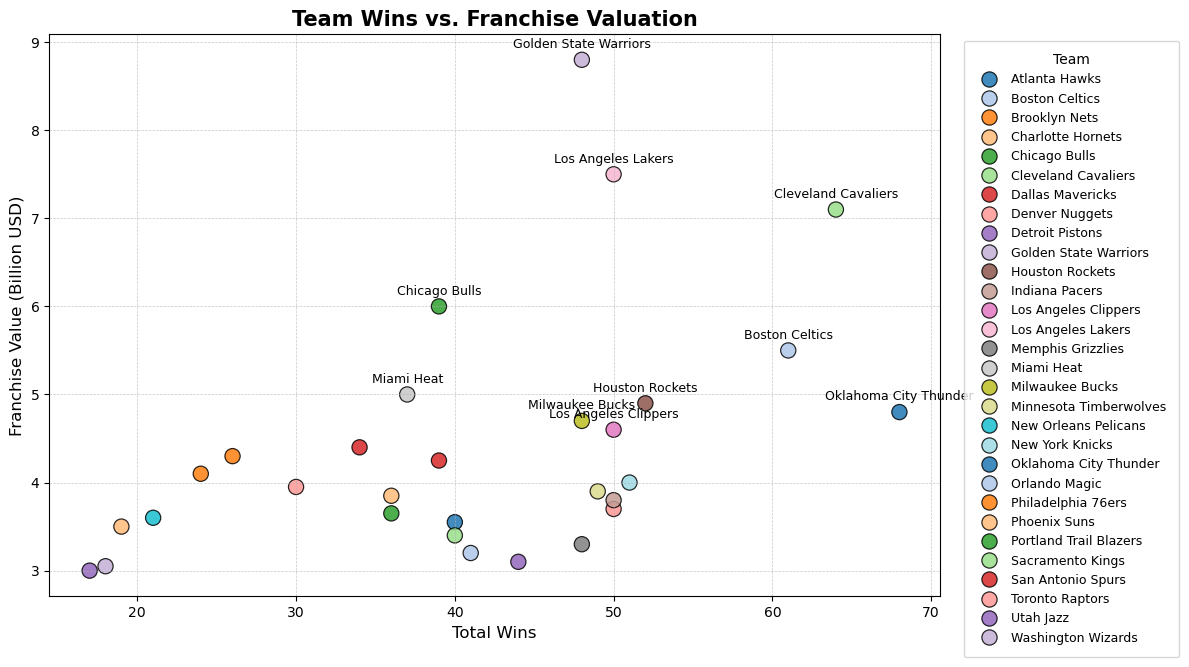

In [781]:
merged1 = pd.merge(teams, valuation, on="TEAM_NAME")

# Create plot
plt.figure(figsize=(12, 7))
ax = sns.scatterplot(
    data=merged1,
    x='W',
    y='Franchise Value (billion USD)',
    hue='TEAM_NAME',       # each team gets its own color
    palette='tab20',
    s=120,
    edgecolor='black',
    alpha=0.85,
    legend='full'
)

# Label top 10 teams by franchise value
top_10 = merged1.nlargest(10, 'Franchise Value (billion USD)')
for _, row in top_10.iterrows():
    ax.text(row['W'], 
            row['Franchise Value (billion USD)'] + 0.1,  # vertical nudge
            row['TEAM_NAME'],
            fontsize=9, ha='center', va='bottom')

# Title and labels
plt.title('Team Wins vs. Franchise Valuation', fontsize=15, weight='bold')
plt.xlabel('Total Wins', fontsize=12)
plt.ylabel('Franchise Value (Billion USD)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Legend styling
plt.legend(title='Team', bbox_to_anchor=(1.02, 1), loc='upper left',
           frameon=True, borderpad=1, fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()

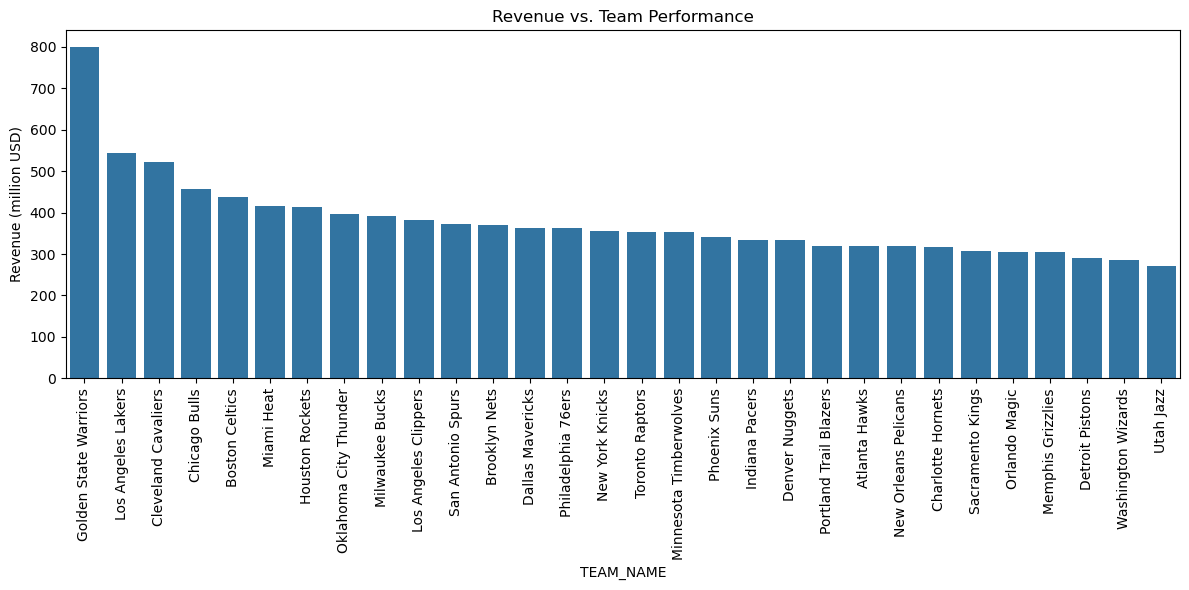

In [586]:
merged2 = pd.merge(teams, rev, on="TEAM_NAME")
plt.figure(figsize=(12,6))
sns.barplot(data=merged2.sort_values("Revenue (million USD)", ascending=False),
            x="TEAM_NAME", y="Revenue (million USD)")
plt.title('Revenue vs. Team Performance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

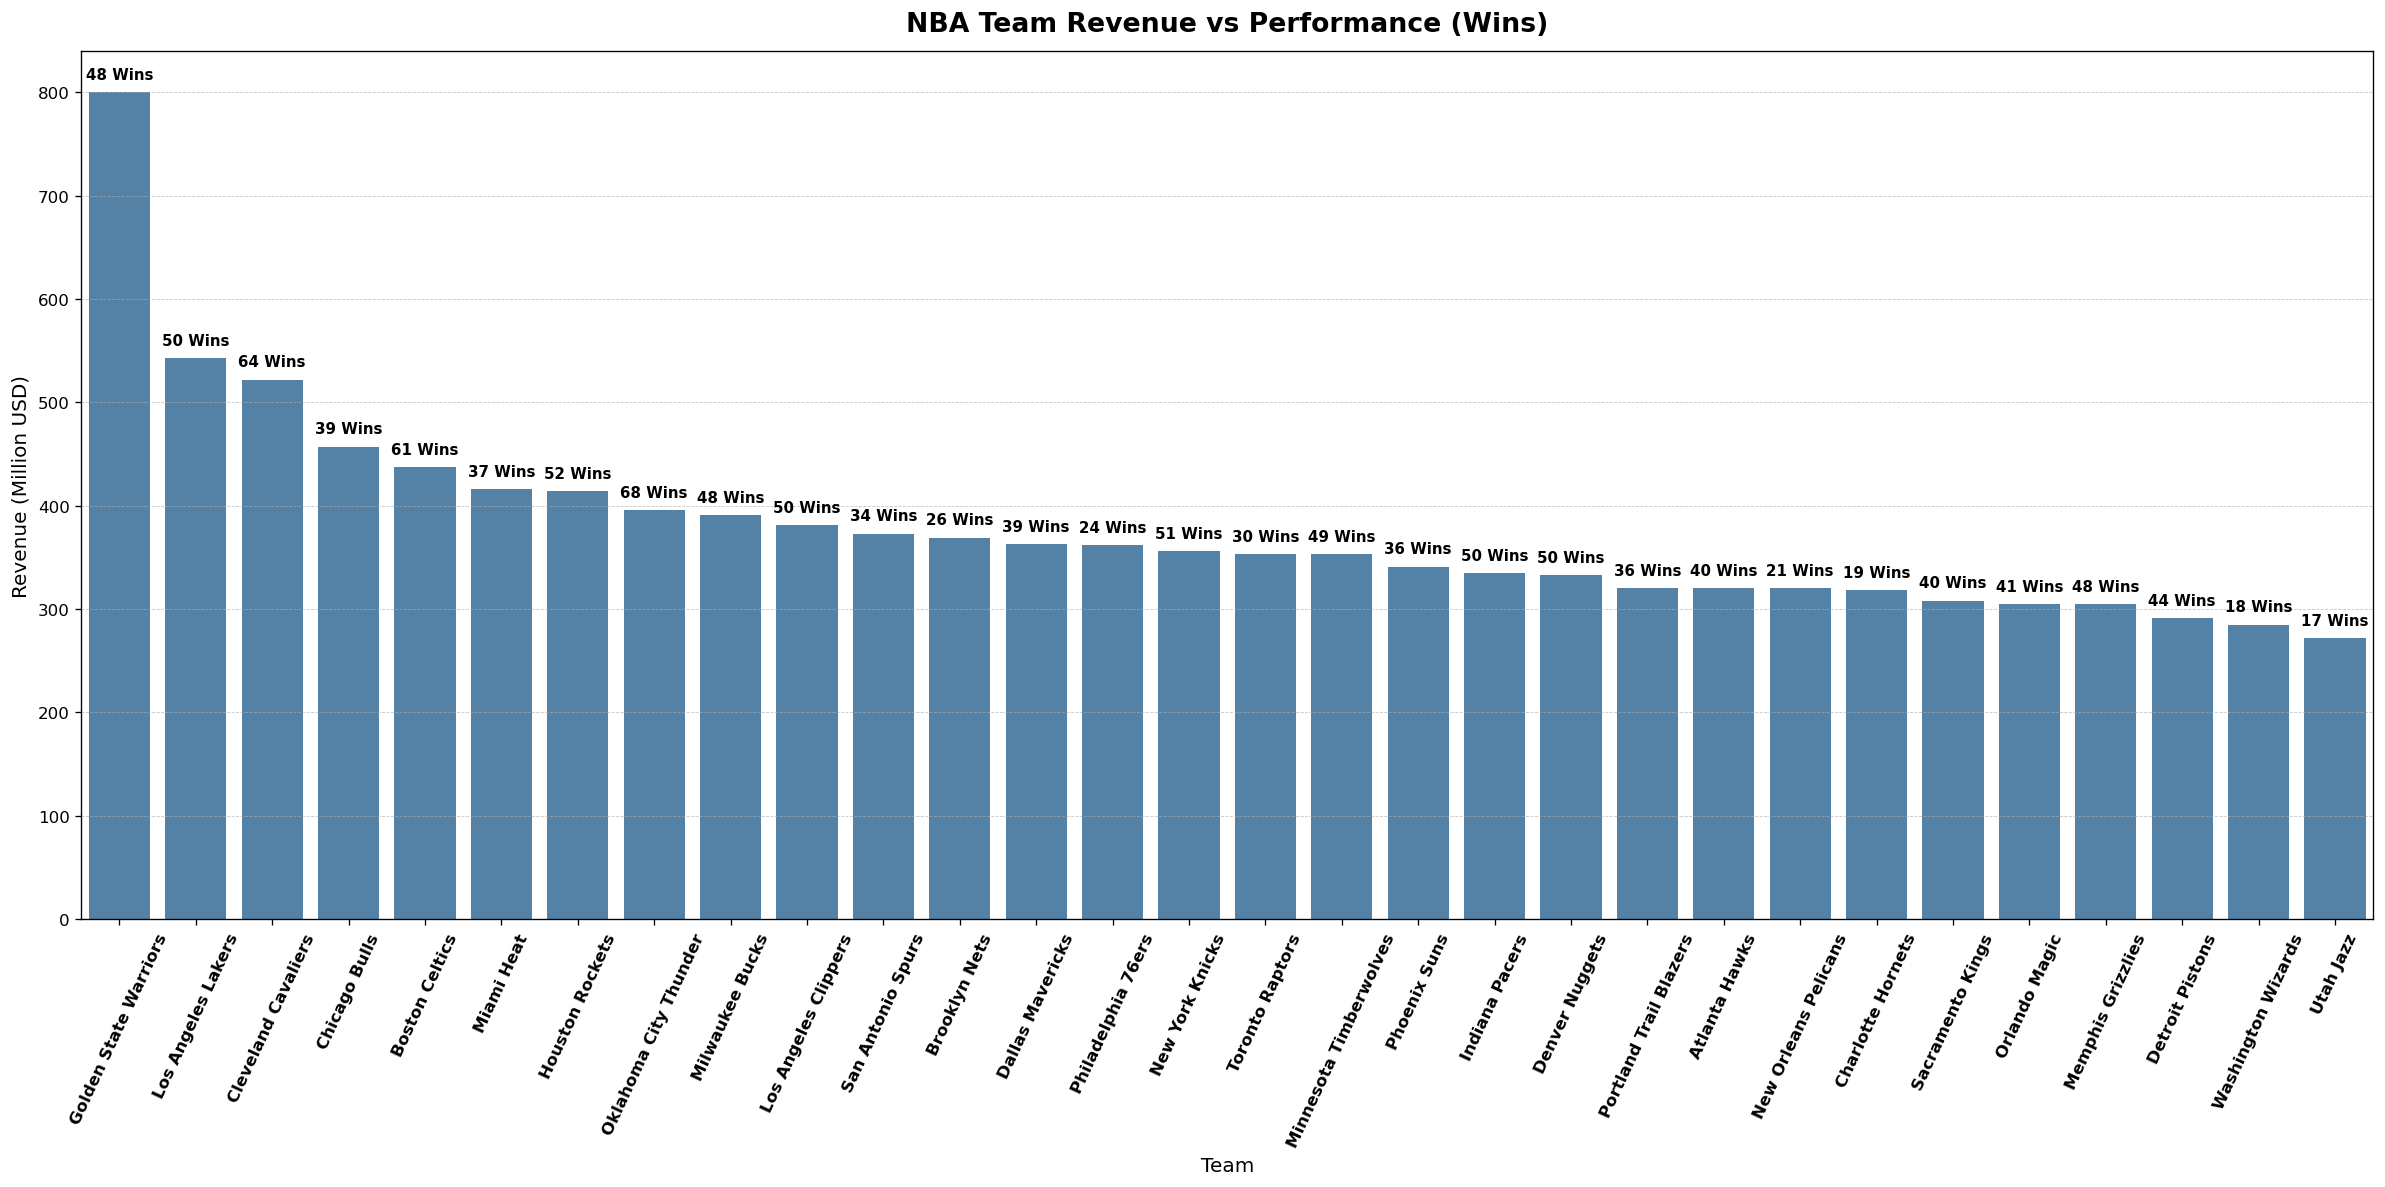

In [805]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge and sort
merged2 = pd.merge(teams, rev, on="TEAM_NAME")
merged2_sorted = merged2.sort_values("Revenue (million USD)", ascending=False)

# Barplot for revenue
plt.figure(figsize=(20, 10), dpi=120)
ax = sns.barplot(
    data=merged2_sorted,
    x='TEAM_NAME', 
    y='Revenue (million USD)', 
    color='steelblue'
)

# Annotate using bar positions
for bar, (_, row) in zip(ax.patches, merged2_sorted.iterrows()):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,    # center of bar
        height + 10,                          # just above the bar
        f"{int(row['W'])} Wins",
        ha='center', va='bottom',
        fontsize=9, fontweight='bold', color='black'
    )

# Final touch-ups
ax.set_title('NBA Team Revenue vs Performance (Wins)', fontsize=16, weight='bold', pad=12)
ax.set_xlabel('Team', fontsize=12)
ax.set_ylabel('Revenue (Million USD)', fontsize=12)
plt.xticks(rotation=65, fontsize=10, weight='bold')
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [635]:
team_name_map = {
    "Hawks": "Atlanta Hawks",
    "Celtics": "Boston Celtics",
    "Pelicans": "New Orleans Pelicans",
    "Bulls": "Chicago Bulls",
    "Cavaliers": "Cleveland Cavaliers",
    "Mavericks": "Dallas Mavericks",
    "Nuggets": "Denver Nuggets",
    "Pistons": "Detroit Pistons",
    "Warriors": "Golden State Warriors",
    "Rockets": "Houston Rockets",
    "Pacers": "Indiana Pacers",
    "Clippers": "Los Angeles Clippers",
    "Lakers": "Los Angeles Lakers",
    "Heat": "Miami Heat",
    "Bucks": "Milwaukee Bucks",
    "Timberwolves": "Minnesota Timberwolves",
    "Nets": "Brooklyn Nets",
    "NY Knicks": "New York Knicks",
    "Magic": "Orlando Magic",
    "76ers": "Philadelphia 76ers",
    "Suns": "Phoenix Suns",
    "Trail Blazers": "Portland Trail Blazers",
    "Kings": "Sacramento Kings",
    "Spurs": "San Antonio Spurs",
    "Thunder": "Oklahoma City Thunder",
    "Jazz": "Utah Jazz",
    "Wizards": "Washington Wizards",
    "Raptors": "Toronto Raptors",
    "Grizzlies": "Memphis Grizzlies",
    "Hornets": "Charlotte Hornets",
    "Team Chuck": "NAN",
    "Team Shaq":"NAN"
}



In [643]:
attendance["Team"] = attendance["Team"].str.strip()
attendance["TEAM_NAME"] = attendance["Team"].map(team_name_map)
attendance

,Rank,Team,Home GMS,Home Total Attendance,TEAM_NAME
0,1.0,Hawks,40,657613,Atlanta Hawks
1,NaN,Celtics,41,785396,Boston Celtics
2,NaN,Pelicans,41,689400,New Orleans Pelicans
3,NaN,Bulls,41,825659,Chicago Bulls
4,NaN,Cavaliers,41,796712,Cleveland Cavaliers
5,NaN,Mavericks,40,803174,Dallas Mavericks
6,NaN,Nuggets,41,811211,Denver Nuggets
7,NaN,Pistons,41,781929,Detroit Pistons
8,NaN,Warriors,41,740624,Golden State Warriors
9,NaN,Rockets,41,716853,Houston Rockets


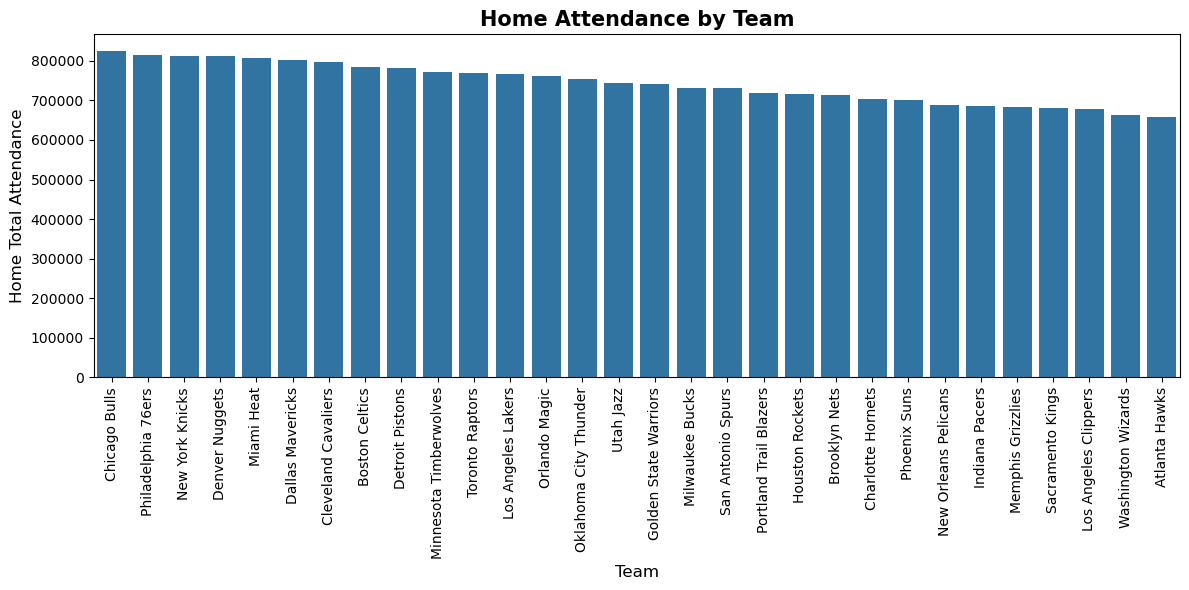

In [815]:
merged4 = pd.merge(teams, attendance, on="TEAM_NAME")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=merged4.sort_values("Home Total Attendance", ascending=False),
    x="TEAM_NAME",
    y="Home Total Attendance"
)

plt.title('Home Attendance by Team', fontsize=15, weight='bold')
plt.xlabel('Team', fontsize=12)  # ← Changed here
plt.ylabel('Home Total Attendance', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

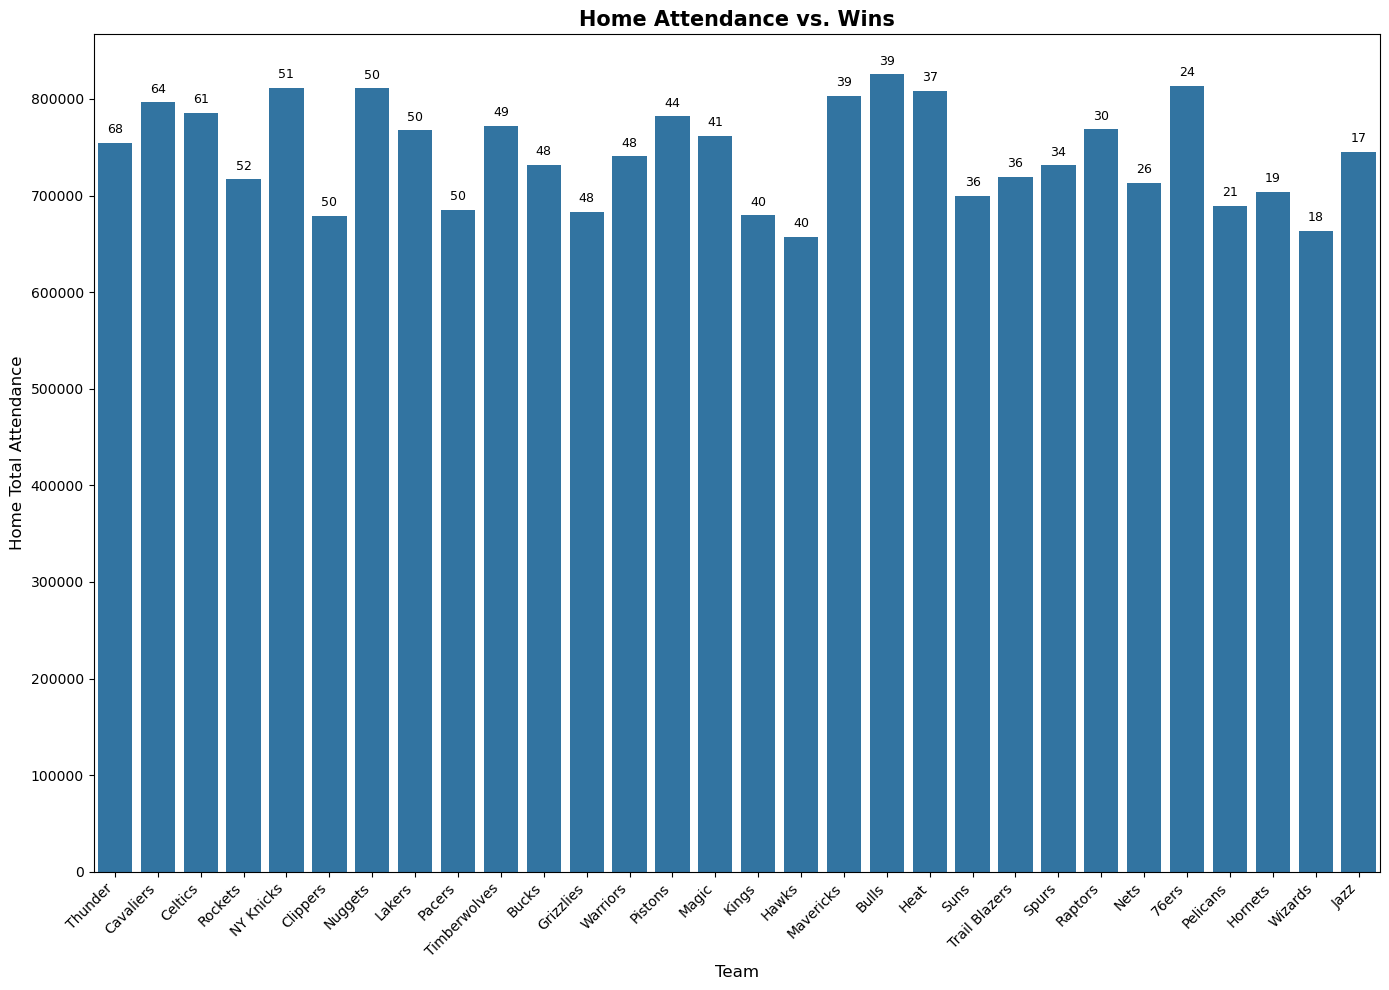

In [821]:
plt.figure(figsize=(14, 10))

# Sort the dataframe by Wins in descending order
sorted_data = merged4.sort_values("W", ascending=False).reset_index(drop=True)

# Plot bar chart
ax = sns.barplot(data=sorted_data, x="Team", y="Home Total Attendance")

# Annotate each bar with number of wins
for index, row in sorted_data.iterrows():
    ax.text(index, row["Home Total Attendance"] + 10000,
            str(row["W"]), ha='center', fontsize=9, color='black')

# Final touches
plt.title('Home Attendance vs. Wins', fontsize=15, weight='bold')
plt.xlabel('Team', fontsize=12)
plt.ylabel('Home Total Attendance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [695]:
metrics

,Franchise Value (billion USD)_x,Instagram Followers (millions),X Followers (millions),Franchise Value (billion USD)_y,Revenue (million USD)
TEAM_NAME,,,,,
Golden State Warriors,8.80,90.6,45.7,8.80,800
Los Angeles Lakers,7.50,32.6,12.0,7.50,543
Cleveland Cavaliers,7.10,25.3,8.5,7.10,522
Chicago Bulls,6.00,16.6,5.0,6.00,457
Boston Celtics,5.50,10.2,4.7,5.50,437
Miami Heat,5.00,8.4,4.1,5.00,416
Houston Rockets,4.90,6.7,3.5,4.90,414
Oklahoma City Thunder,4.80,6.3,3.3,4.80,396
Milwaukee Bucks,4.70,6.1,3.2,4.70,391


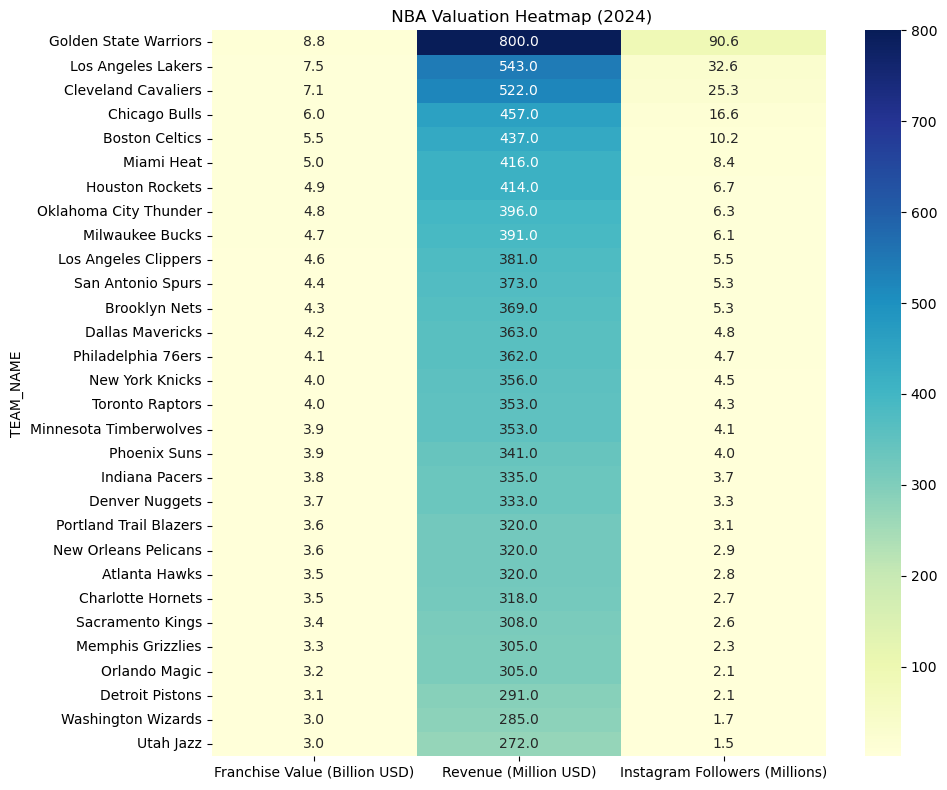

Text(0, 0.5, 'Team')

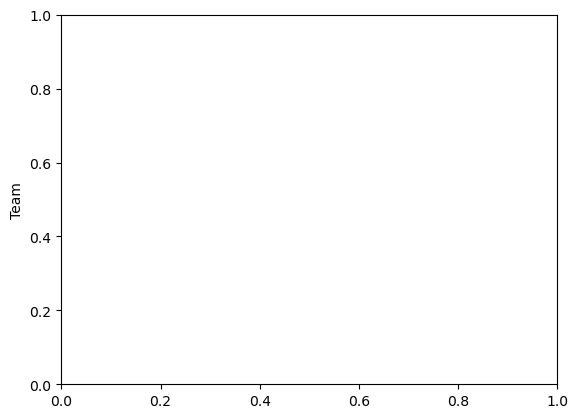

In [825]:
metrics = pd.merge(valuation, BI, on="TEAM_NAME")
metrics.columns = metrics.columns.str.strip()
metrics.set_index("TEAM_NAME", inplace=True)
metrics = metrics.rename(columns={
    'Franchise Value (billion USD)_x': 'Franchise Value (Billion USD)',
    'Revenue (million USD)': 'Revenue (Million USD)',
    'Instagram Followers (millions)': 'Instagram Followers (Millions)'
})

heatmap_data = metrics[['Franchise Value (Billion USD)', 'Revenue (Million USD)', 'Instagram Followers (Millions)']]
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title(" NBA Valuation Heatmap (2024)")
plt.tight_layout()
plt.show()

In [773]:
cnbc_valuation.reset_index(inplace=True)

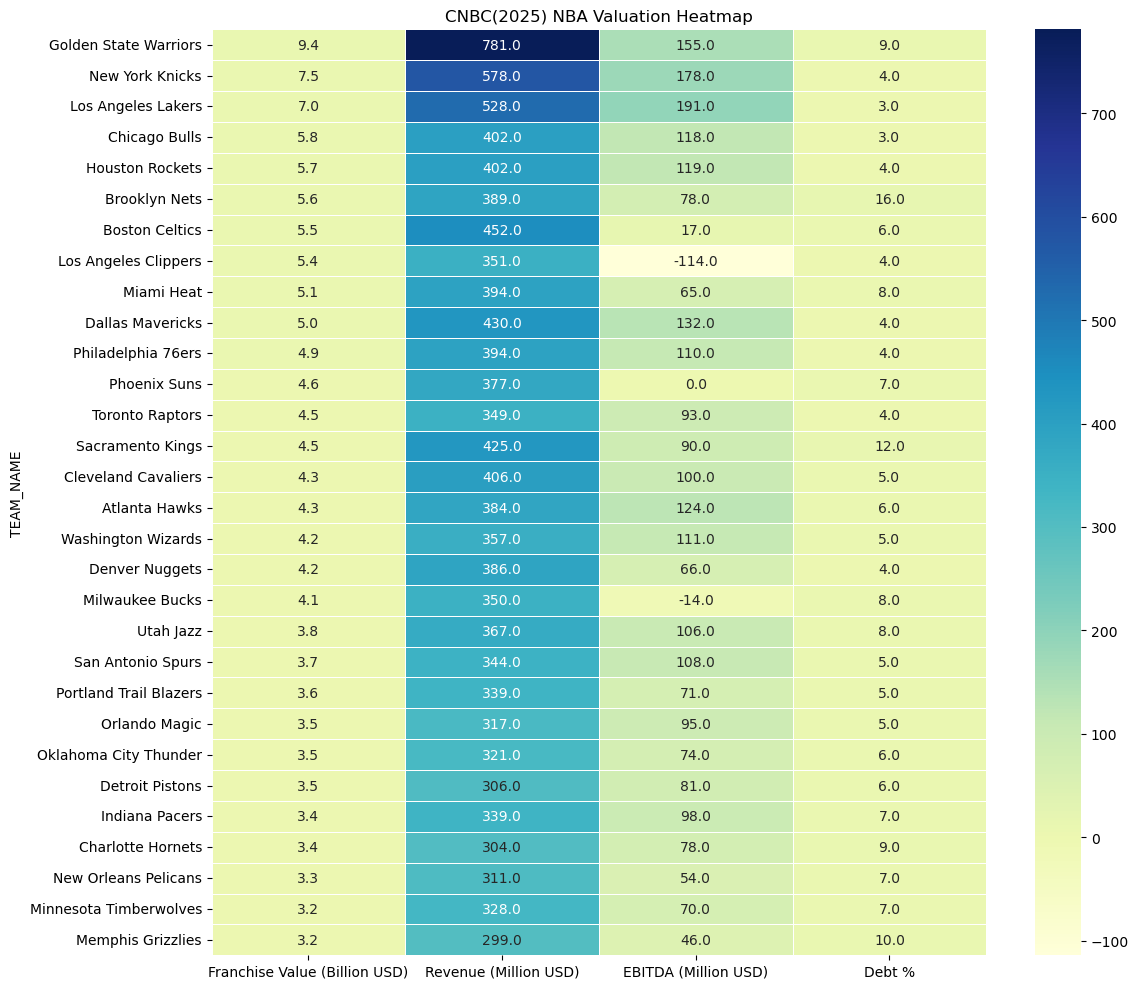

In [775]:
cnbc_valuation.columns = cnbc_valuation.columns.str.strip()

# Optionally rename columns for clarity and consistency
cnbc_valuation = cnbc_valuation.rename(columns={
    'Value (Billion USD)': 'Franchise Value (Billion USD)',
    'Revenue (Million USD)': 'Revenue (Million USD)',
    'EBITDA (Million USD)': 'EBITDA (Million USD)'
})

# Set the index to team names
cnbc_valuation.set_index('TEAM_NAME', inplace=True)
cnbc_valuation['Debt %'] = cnbc_valuation['Debt as % of Value'].str.rstrip('%').astype(float)

# Select relevant columns for the heatmap
heatmap_data = cnbc_valuation[['Franchise Value (Billion USD)', 'Revenue (Million USD)', 'EBITDA (Million USD)', 'Debt %']]


# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("CNBC(2025) NBA Valuation Heatmap")
plt.tight_layout()
plt.show()

In [723]:
players

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
0,1631260,AJ Green,AJ,1610612749,MIL,25.0,5,1,4,0.200,...,113,134,41,146,70,73,88,41,4,81
1,203932,Aaron Gordon,Aaron,1610612743,DEN,29.0,7,4,3,0.571,...,68,8,25,20,23,62,41,41,4,40
2,1628988,Aaron Holiday,Aaron,1610612745,HOU,28.0,3,3,0,1.000,...,140,134,131,93,128,168,153,41,4,148
3,1630174,Aaron Nesmith,Aaron,1610612754,IND,25.0,6,5,1,0.833,...,53,87,6,74,49,32,51,19,4,49
4,1630598,Aaron Wiggins,Aaron,1610612760,OKC,26.0,4,4,0,1.000,...,140,68,153,93,79,56,111,41,4,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1631246,Vince Williams Jr.,Vince,1610612763,MEM,24.0,3,0,3,0.000,...,86,134,131,149,122,79,118,41,4,118
205,1628427,Vlatko Čančar,Vlatko,1610612743,DEN,28.0,2,2,0,1.000,...,140,134,181,169,191,162,209,41,4,204
206,1628976,Wendell Carter Jr.,Wendell,1610612753,ORL,26.0,5,1,4,0.200,...,76,52,48,60,75,199,59,12,4,61
207,1641744,Zach Edey,Zach,1610612763,MEM,22.0,4,0,4,0.000,...,2,42,25,54,103,202,68,41,4,78


In [725]:
valuation

,TEAM_NAME,Franchise Value (billion USD)
0,Golden State Warriors,8.80
1,Los Angeles Lakers,7.50
2,Cleveland Cavaliers,7.10
3,Chicago Bulls,6.00
4,Boston Celtics,5.50
5,Miami Heat,5.00
6,Houston Rockets,4.90
7,Oklahoma City Thunder,4.80
8,Milwaukee Bucks,4.70
9,Los Angeles Clippers,4.60


In [727]:
cnbc_valuation

,Rank,Franchise Value (Billion USD),Revenue (Million USD),EBITDA (Million USD),Debt as % of Value,Owner(s),Debt %
TEAM_NAME,,,,,,,
Golden State Warriors,1,9.40,781,155,9%,"Joe Lacob, Peter Guber",9.0
New York Knicks,2,7.50,578,178,4%,Madison Square Garden Sports,4.0
Los Angeles Lakers,3,7.00,528,191,3%,"Jerry Buss family trust, Mark Walter, Todd Boehly",3.0
Chicago Bulls,4,5.80,402,118,3%,Jerry Reinsdorf,3.0
Houston Rockets,5,5.70,402,119,4%,Tilman Fertitta,4.0
Brooklyn Nets,6,5.60,389,78,16%,Joe Tsai,16.0
Boston Celtics,7,5.50,452,17,6%,"Wyc Grousbeck, Irving Grousbeck, Stephen Pagli...",6.0
Los Angeles Clippers,8,5.40,351,-114,4%,Steve Ballmer,4.0
Miami Heat,9,5.10,394,65,8%,Micky Arison,8.0


In [753]:
# Sort by PPG and pick top 15
star_players_ppg = players.sort_values(by='PTS', ascending=False).head(30)
star_players_ppg = pd.merge(star_players_ppg, teams[['TEAM_ID', 'TEAM_NAME']], on='TEAM_ID', how='left')
star_players_ppg['TEAM_NAME']
star_players_ppg

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_NAME
0,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,30.0,5,1,4,0.200,...,10,48,1,1,178,1,2,2,1,Milwaukee Bucks
1,1628973,Jalen Brunson,Jalen,1610612752,NYK,28.0,6,4,2,0.667,...,23,19,2,2,66,8,19,4,8,New York Knicks
2,1628369,Jayson Tatum,Jayson,1610612738,BOS,27.0,4,3,1,0.750,...,42,45,5,3,3,3,7,4,2,Boston Celtics
3,1629029,Luka Dončić,Luka,1610612747,LAL,26.0,5,1,4,0.200,...,52,21,3,4,166,7,19,4,5,Los Angeles Lakers
4,1631094,Paolo Banchero,Paolo,1610612753,ORL,22.0,5,1,4,0.200,...,2,11,8,5,179,12,19,4,9,Orlando Magic
5,1628983,Shai Gilgeous-Alexander,Shai,1610612760,OKC,26.0,4,4,0,1.000,...,3,25,10,6,11,10,41,4,10,Oklahoma City Thunder
6,1630162,Anthony Edwards,Anthony,1610612750,MIN,23.0,5,4,1,0.800,...,21,72,22,7,19,6,19,4,7,Minnesota Timberwolves
7,1630532,Franz Wagner,Franz,1610612753,ORL,23.0,5,1,4,0.200,...,10,21,25,8,190,15,41,4,15,Orlando Magic
8,1628378,Donovan Mitchell,Donovan,1610612739,CLE,28.0,5,4,1,0.800,...,52,97,16,9,27,20,41,4,18,Cleveland Cavaliers
9,2544,LeBron James,LeBron,1610612747,LAL,40.0,5,1,4,0.200,...,25,97,4,10,185,4,7,4,4,Los Angeles Lakers


In [755]:
from sklearn.preprocessing import MinMaxScaler

# Select and scale relevant columns
metrics = star_players_ppg[['PTS', 'AST', 'OREB', 'DREB', 'STL', 'BLK', 'FG_PCT']].copy()
metrics['REB'] = metrics['OREB'] + metrics['DREB']
metrics.drop(columns=['OREB', 'DREB'], inplace=True)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(metrics)
star_players_ppg['Skill_Score'] = scaled.mean(axis=1)  # Simple average, or weight manually



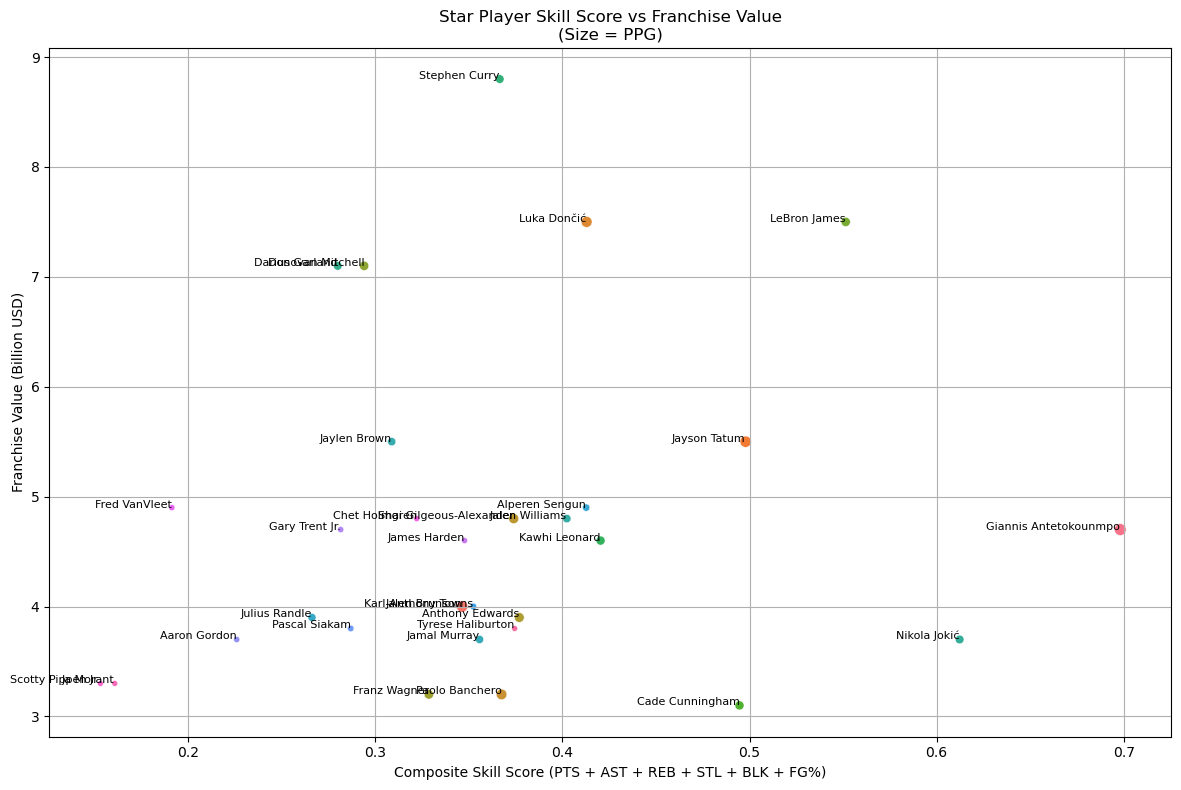

In [757]:
merged = pd.merge(star_players_ppg, valuation, on="TEAM_NAME", how="inner")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged,
                x='Skill_Score', y='Franchise Value (billion USD)',
                size='PTS', hue='PLAYER_NAME', legend=False)

# Annotate players
for _, row in merged.iterrows():
    plt.text(row['Skill_Score'], row['Franchise Value (billion USD)'],
             row['PLAYER_NAME'], fontsize=8, ha='right')

plt.title("Star Player Skill Score vs Franchise Value\n(Size = PPG)")
plt.xlabel("Composite Skill Score (PTS + AST + REB + STL + BLK + FG%)")
plt.ylabel("Franchise Value (Billion USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


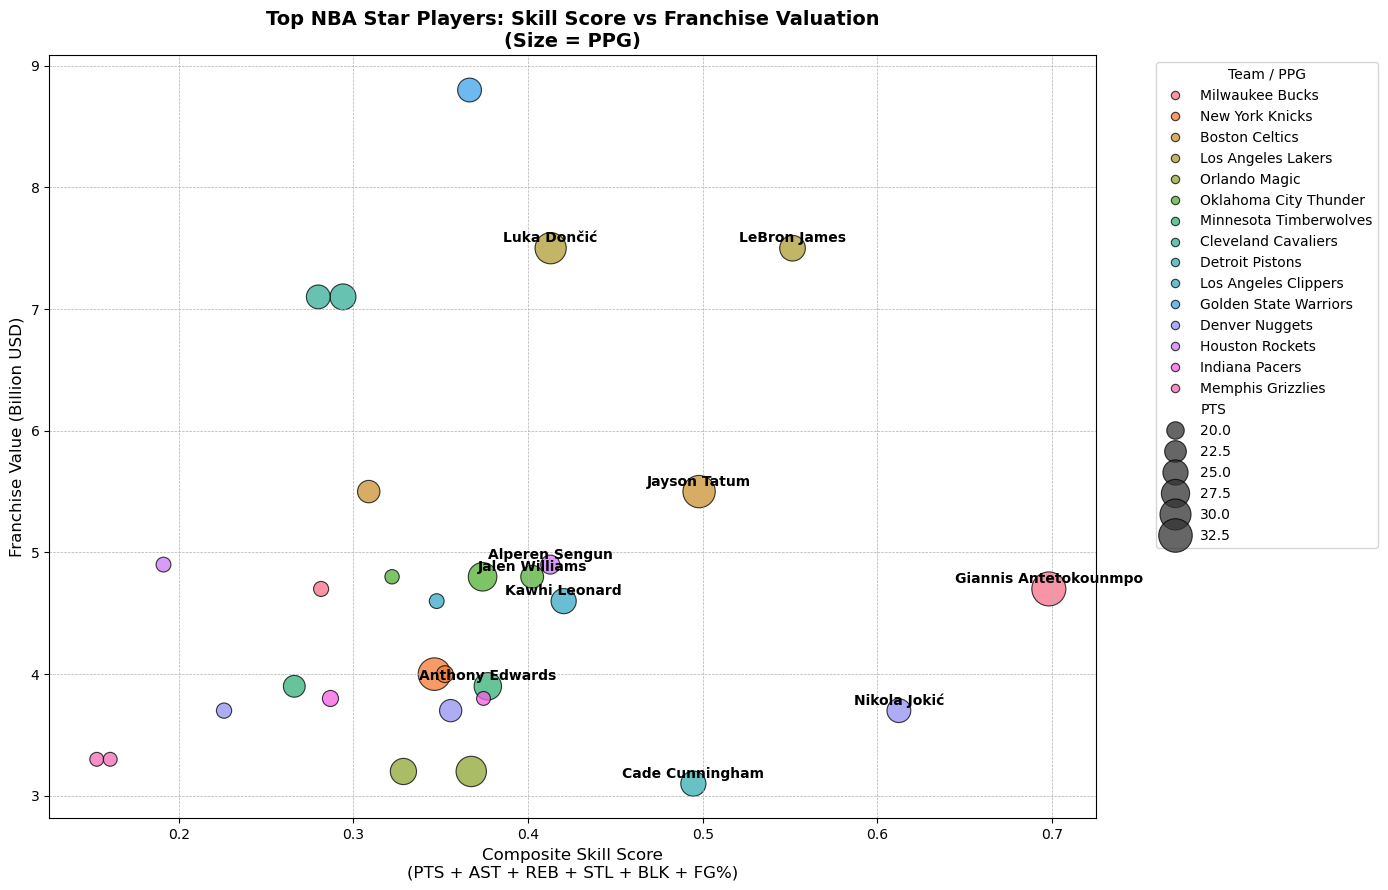

In [761]:
plt.figure(figsize=(14, 9))

# Step 1: Plot with size legend (PPG) and no color legend
scatter = sns.scatterplot(
    data=merged,
    x='Skill_Score',
    y='Franchise Value (billion USD)',
    size='PTS',
    hue='TEAM_NAME',  # Use TEAM_NAME for fewer legend items (optional)
    sizes=(100, 600),
    edgecolor="black",
    alpha=0.75
)

# Step 2: Annotate top 10 players by skill score
top_players = merged.sort_values('Skill_Score', ascending=False).head(10)
for _, row in top_players.iterrows():
    plt.text(row['Skill_Score'], row['Franchise Value (billion USD)'] + 0.05,
             row['PLAYER_NAME'], fontsize=10, ha='center', fontweight='bold')

# Grid and labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel("Composite Skill Score\n(PTS + AST + REB + STL + BLK + FG%)", fontsize=12)
plt.ylabel("Franchise Value (Billion USD)", fontsize=12)
plt.title("Top NBA Star Players: Skill Score vs Franchise Valuation\n(Size = PPG)", fontsize=14, fontweight='bold')

# Format ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show legend for size (PPG)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:], title="Team / PPG", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


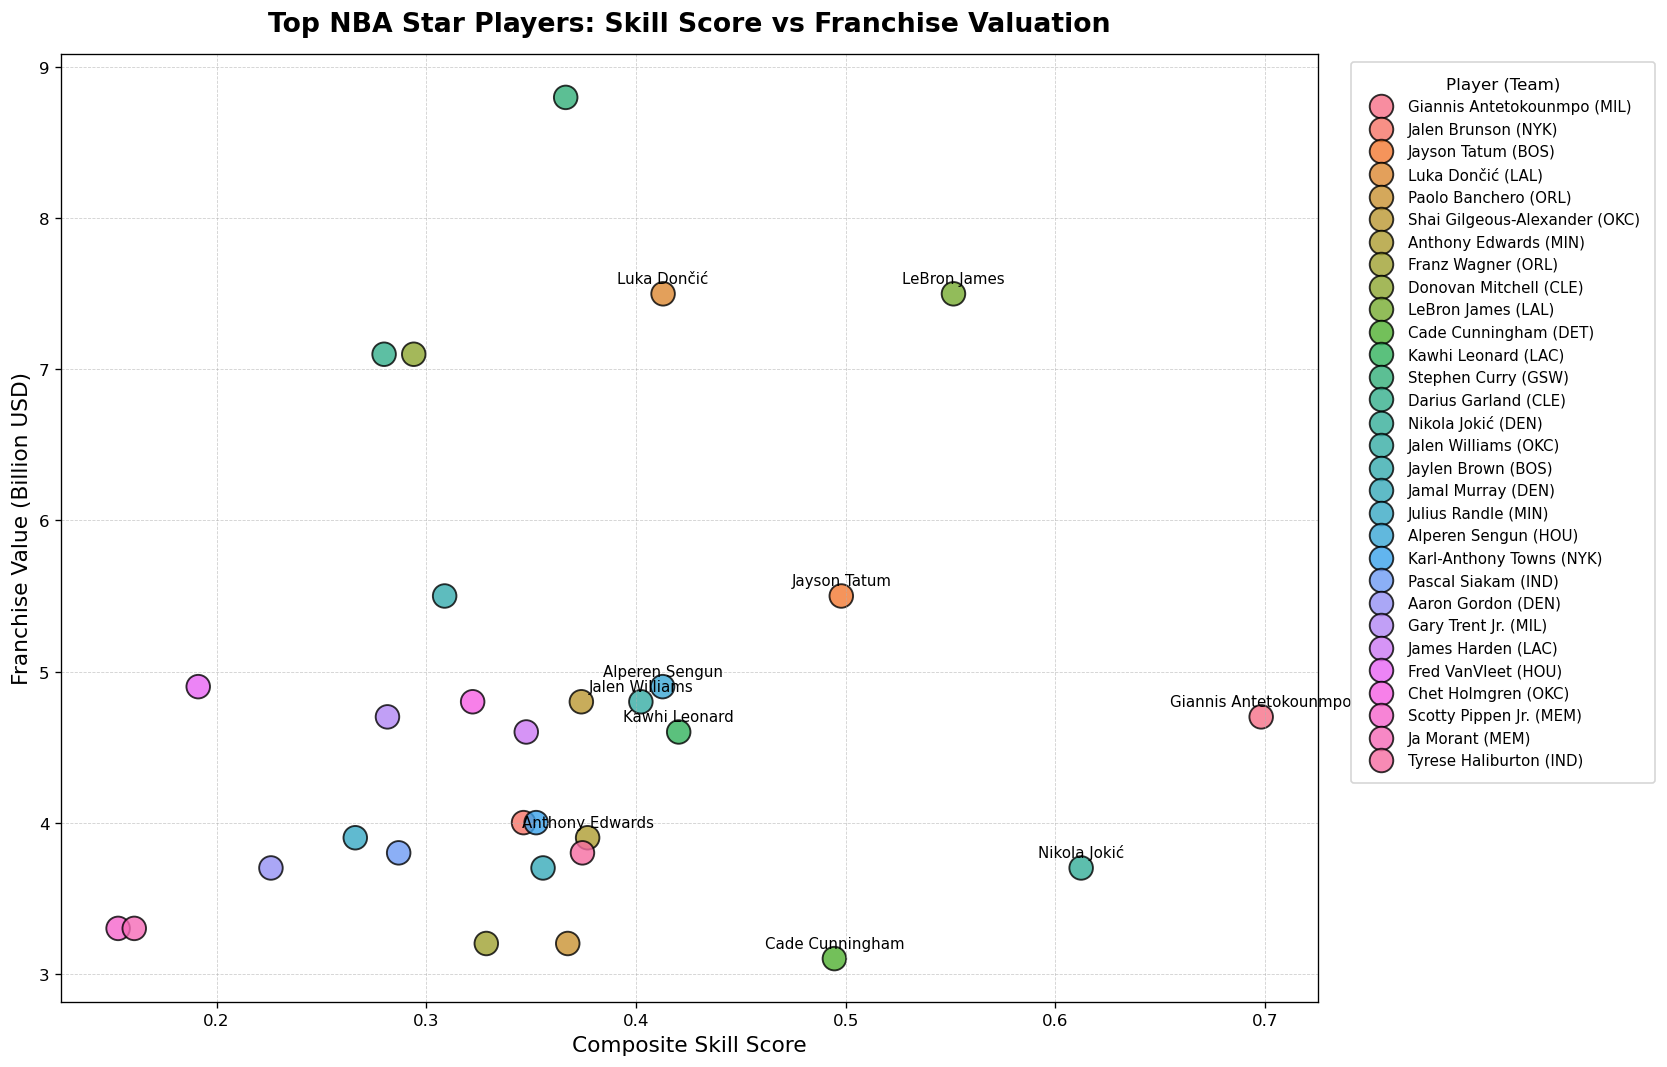

In [765]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1⃣  Create label: "Player (TEAM)"
merged['PLAYER_TEAM'] = (
    merged['PLAYER_NAME'] + ' (' + merged['TEAM_ABBREVIATION'] + ')'
)

# 2⃣  Scatter plot without size mapping
plt.figure(figsize=(14, 9), dpi=120)
ax = sns.scatterplot(
    data=merged,
    x='Skill_Score',
    y='Franchise Value (billion USD)',
    hue='PLAYER_TEAM',
    edgecolor='black',
    s=200,                  # fixed dot size
    alpha=0.8,
    legend='full'
)

# 3⃣  Axes formatting
ax.set_title('Top NBA Star Players: Skill Score vs Franchise Valuation', 
             fontsize=16, weight='bold', pad=14)
ax.set_xlabel('Composite Skill Score', fontsize=13)
ax.set_ylabel('Franchise Value (Billion USD)', fontsize=13)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# 4⃣  Clean legend with full list of players
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,
          title='Player (Team)', title_fontsize=10,
          bbox_to_anchor=(1.02, 1), loc='upper left',
          frameon=True, borderpad=1, fontsize=9)

# 5⃣  Optional: Label top 10 players by Skill Score
top_pts = merged.nlargest(10, 'Skill_Score')
for _, row in top_pts.iterrows():
    ax.text(row['Skill_Score'], 
            row['Franchise Value (billion USD)'] + 0.05,
            row['PLAYER_NAME'],
            fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.show()


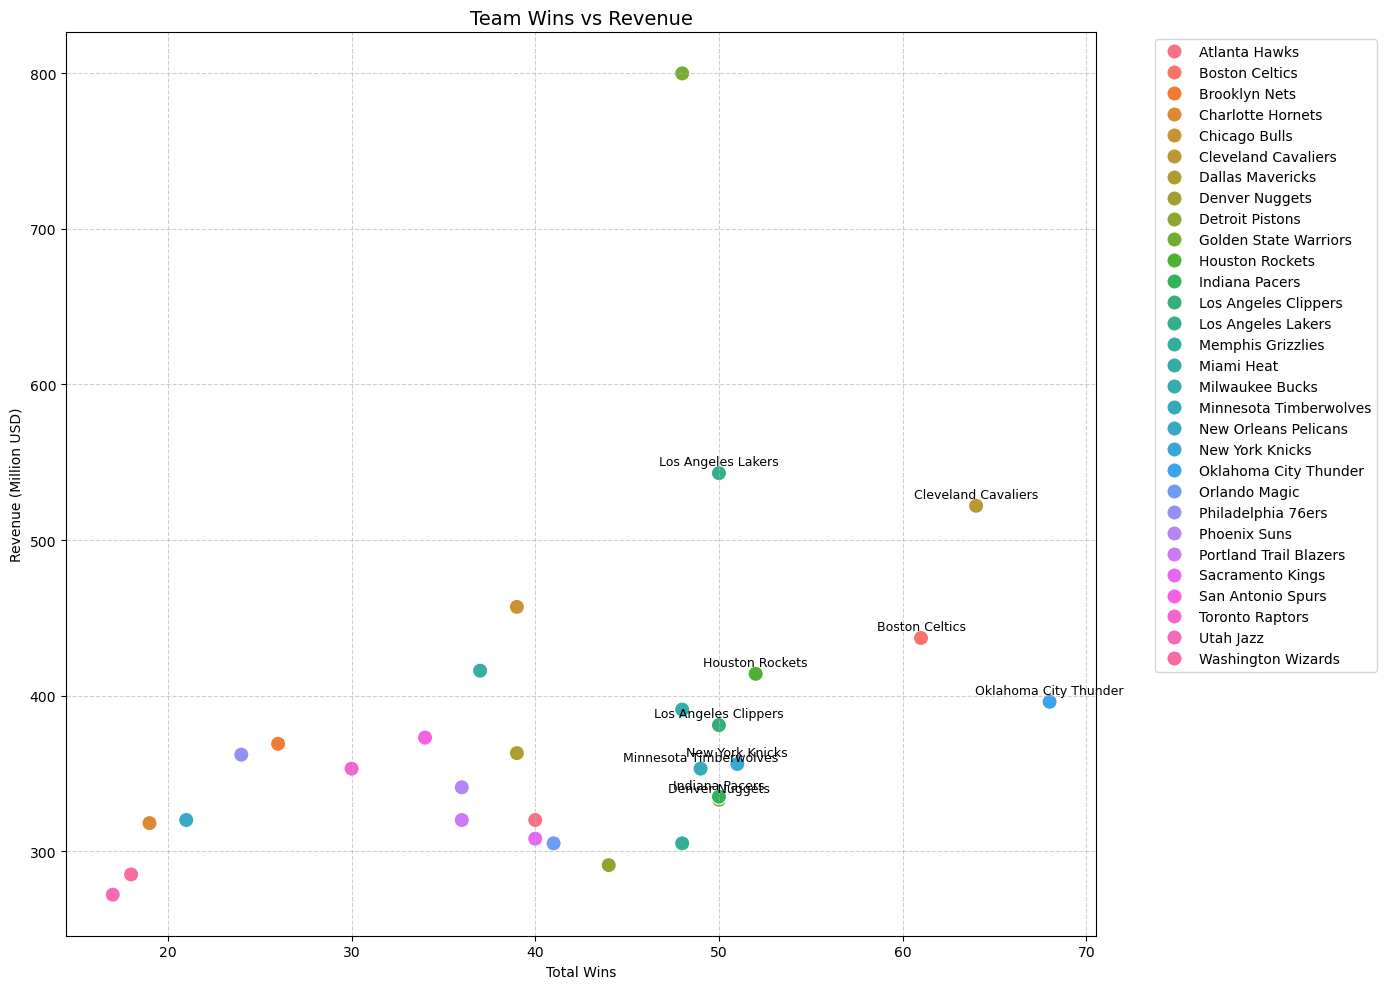

In [843]:
plt.figure(figsize=(14, 10))

# Plot scatter
sns.scatterplot(data=merged2, x='W', y='Revenue (million USD)', hue='TEAM_NAME', s=120)

# Label top 10 teams by Wins
top_teams = merged2.nlargest(10, 'W')
for _, row in top_teams.iterrows():
    plt.text(row['W'], row['Revenue (million USD)'] + 5,  # Slight vertical offset
             row['TEAM_NAME'], fontsize=9, ha='center')

plt.title('Team Wins vs Revenue', fontsize=14)
plt.xlabel('Total Wins')
plt.ylabel('Revenue (Million USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
